**Text-to-Speech Model**

---


We are fine tuning the speech to text t5 model from hugging face on keithito/lj_Speech datset available on Hugging face. The dataset consists of over 10,000 audio text samples by a single speaker.


First let's install all dependencies.

In [1]:
!pip install datasets soundfile speechbrain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.8/824.8 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-vbpq_nht
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-vbpq_nht
  Resolved https://github.com/huggingface/transformers.git to commit 4cc65e990fa03158ac5e1d4d2d034cadae0c6213
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.51.0.dev0-py3-none-any.whl size=11072163 sha256=1bbaf44de7b2a48682cfd41ee8790d9f2ad1edaa5880e7deebe33e961c51fa4e
  Stored in directory: /tmp/pip-ephem-wheel-cache-x67ywlek/wheels/32/4b/78/f195c684dd3a9ed21f3b39fe8f85b48df7918581b6437be143
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.50.0
    Uninstalling transformers-4.50.0:
      Successfully uninstalled transformers-4.50.0


In [3]:
!pip install --upgrade accelerate

In [4]:
!nvidia-smi

Thu Mar 27 15:01:59 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
!pip install datasets

**Loading the Model and Dataset**

In [6]:
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech

processor = SpeechT5Processor.from_pretrained("microsoft/speecht5_tts")
model = SpeechT5ForTextToSpeech.from_pretrained("microsoft/speecht5_tts")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/585M [00:00<?, ?B/s]

In [7]:
from datasets import load_dataset, Audio

dataset = load_dataset("keithito/lj_speech", "main", split="train")


README.md:   0%|          | 0.00/8.88k [00:00<?, ?B/s]

lj_speech.py:   0%|          | 0.00/3.92k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/13100 [00:00<?, ? examples/s]

In [8]:
dataset = dataset.cast_column("audio", Audio(sampling_rate=16000))

In [9]:
len(dataset)

13100

**Preparing dataset**


Speaker embeddings need to be generated for the speaker so that our model could capture the uniqueness of the speaker.

In [10]:
import os
import torch
from speechbrain.pretrained import EncoderClassifier

spk_model_name = "speechbrain/spkrec-xvect-voxceleb"

device = "cuda" if torch.cuda.is_available() else "cpu"
speaker_model = EncoderClassifier.from_hparams(
    source=spk_model_name,
    run_opts={"device": device},
    savedir=os.path.join("/tmp", spk_model_name)
)

def create_speaker_embedding(waveform):
    with torch.no_grad():
        speaker_embeddings = speaker_model.encode_batch(torch.tensor(waveform))
        speaker_embeddings = torch.nn.functional.normalize(speaker_embeddings, dim=2)
        speaker_embeddings = speaker_embeddings.squeeze().cpu().numpy()
    return speaker_embeddings

<ipython-input-10-9f95de381175>:3: UserWarning: Module 'speechbrain.pretrained' was deprecated, redirecting to 'speechbrain.inference'. Please update your script. This is a change from SpeechBrain 1.0. See: https://github.com/speechbrain/speechbrain/releases/tag/v1.0.0
  from speechbrain.pretrained import EncoderClassifier


hyperparams.yaml:   0%|          | 0.00/2.04k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/speechbrain/utils/autocast.py:68: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)


embedding_model.ckpt:   0%|          | 0.00/16.9M [00:00<?, ?B/s]

mean_var_norm_emb.ckpt:   0%|          | 0.00/3.20k [00:00<?, ?B/s]

classifier.ckpt:   0%|          | 0.00/15.9M [00:00<?, ?B/s]

label_encoder.txt:   0%|          | 0.00/129k [00:00<?, ?B/s]

In [11]:
def prepare_dataset(example):
    # load the audio data; if necessary, this resamples the audio to 16kHz
    audio = example["audio"]

    # feature extraction and tokenization
    example = processor(
        text=example["normalized_text"],
        audio_target=audio["array"],
        sampling_rate=audio["sampling_rate"],
        return_attention_mask=False,
        #why return attention mask
    )

    # strip off the batch dimension
    example["labels"] = example["labels"][0]

    # use SpeechBrain to obtain x-vector
    example["speaker_embeddings"] = create_speaker_embedding(audio["array"])

    return example

In [12]:
tokenizer = processor.tokenizer

In [13]:
processed_example = prepare_dataset(dataset[0])
list(processed_example.keys())



['input_ids', 'labels', 'speaker_embeddings']

In [14]:
tokenizer.decode(processed_example["input_ids"])

'Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition</s>'

In [15]:
processed_example["speaker_embeddings"].shape

(512,)

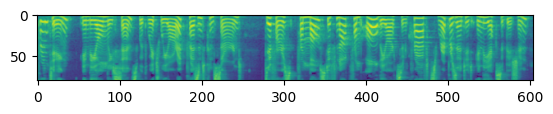

In [16]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(processed_example["labels"].T)
plt.show()

In [17]:
from transformers import SpeechT5HifiGan
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

In [18]:
spectrogram = torch.tensor(processed_example["labels"])
with torch.no_grad():
    speech = vocoder(spectrogram)

model.safetensors:   0%|          | 0.00/50.6M [00:00<?, ?B/s]

In [19]:
from IPython.display import Audio
Audio(speech.cpu().numpy(), rate=16000)

In [20]:
dataset = dataset.map(
    prepare_dataset, remove_columns=dataset.column_names,
)

Map:   0%|          | 0/13100 [00:00<?, ? examples/s]

In [21]:
def is_not_too_long(input_ids):
    input_length = len(input_ids)
    return input_length < 200

dataset = dataset.filter(is_not_too_long, input_columns=["input_ids"])

Filter:   0%|          | 0/13100 [00:00<?, ? examples/s]

In [22]:
len(dataset)

13100

While preparing the dataset, we first formatted our dataset such that it consists of three keys - id, labels and speaker embeddings. We also added end of line token and made sure that the audio generated was correct.

**Train/Test**

We will be first splittling the dataset into two portions, 90% of the dataset is used for training while the rest is used for testing.

In [23]:
dataset = dataset.train_test_split(test_size=0.1)

In [24]:
dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'labels', 'speaker_embeddings'],
        num_rows: 11790
    })
    test: Dataset({
        features: ['input_ids', 'labels', 'speaker_embeddings'],
        num_rows: 1310
    })
})

Collator to make batches

In training pipelines like these, collator is essential for padding and making sure input is converted into tensors.

In [25]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union

@dataclass
class TTSDataCollatorWithPadding:
    processor: Any

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:

        input_ids = [{"input_ids": feature["input_ids"]} for feature in features]
        label_features = [{"input_values": feature["labels"]} for feature in features]
        speaker_features = [feature["speaker_embeddings"] for feature in features]

        # collate the inputs and targets into a batch
        batch = processor.pad(
            input_ids=input_ids,
            labels=label_features,
            return_tensors="pt",
        )

        # replace padding with -100 to ignore loss correctly
        batch["labels"] = batch["labels"].masked_fill(
            batch.decoder_attention_mask.unsqueeze(-1).ne(1), -100
        )

        # not used during fine-tuning
        del batch["decoder_attention_mask"]

        # round down target lengths to multiple of reduction factor
        if model.config.reduction_factor > 1:
            target_lengths = torch.tensor([
                len(feature["input_values"]) for feature in label_features
            ])
            target_lengths = target_lengths.new([
                length - length % model.config.reduction_factor for length in target_lengths
            ])
            max_length = max(target_lengths)
            batch["labels"] = batch["labels"][:, :max_length]

        # also add in the speaker embeddings
        batch["speaker_embeddings"] = torch.tensor(speaker_features)

        return batch

In [26]:
data_collator = TTSDataCollatorWithPadding(processor=processor)

In [27]:
features = [
    dataset["train"][0],
    dataset["train"][1],
    dataset["train"][20],
]

batch = data_collator(features)

In [28]:
{k:v.shape for k,v in batch.items()}

{'input_ids': torch.Size([3, 139]),
 'attention_mask': torch.Size([3, 139]),
 'labels': torch.Size([3, 500, 80]),
 'speaker_embeddings': torch.Size([3, 512])}

**Training**

To train the model, we log in to Hugging face. We create a training args which specifies all the checkpoints, steps, output location,etc.

In [34]:
from huggingface_hub import notebook_login

notebook_login()

In [35]:
model.config.use_cache = False

In [36]:
from transformers import Seq2SeqTrainingArguments
help(Seq2SeqTrainingArguments)

Help on class Seq2SeqTrainingArguments in module transformers.training_args_seq2seq:

class Seq2SeqTrainingArguments(transformers.training_args.TrainingArguments)
 |  Seq2SeqTrainingArguments(output_dir: Optional[str] = None, overwrite_output_dir: bool = False, do_train: bool = False, do_eval: bool = False, do_predict: bool = False, eval_strategy: Union[transformers.trainer_utils.IntervalStrategy, str] = 'no', prediction_loss_only: bool = False, per_device_train_batch_size: int = 8, per_device_eval_batch_size: int = 8, per_gpu_train_batch_size: Optional[int] = None, per_gpu_eval_batch_size: Optional[int] = None, gradient_accumulation_steps: int = 1, eval_accumulation_steps: Optional[int] = None, eval_delay: Optional[float] = 0, torch_empty_cache_steps: Optional[int] = None, learning_rate: float = 5e-05, weight_decay: float = 0.0, adam_beta1: float = 0.9, adam_beta2: float = 0.999, adam_epsilon: float = 1e-08, max_grad_norm: float = 1.0, num_train_epochs: float = 3.0, max_steps: int = -

In [37]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="./speecht5_tts_voxpopuli_nl",  # change to a repo name of your choice
    per_device_train_batch_size=16,
    gradient_accumulation_steps=2,
    learning_rate=1e-5,
    warmup_steps=500,
    max_steps=4000,
    gradient_checkpointing=True,
    fp16=True,
    eval_strategy="steps",
    per_device_eval_batch_size=8,
    save_steps=1000,
    eval_steps=1000,
    logging_steps=25,
    report_to=["tensorboard"],
    load_best_model_at_end=True,
    greater_is_better=False,
    label_names=["labels"],
    push_to_hub=True,
)

In [38]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    data_collator=data_collator,
    tokenizer=processor.tokenizer,
)

<ipython-input-38-4a9303382841>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


In [39]:
trainer.train()

Step,Training Loss,Validation Loss
1000,0.437100,0.390607
2000,0.411000,0.379892
3000,0.409700,0.376528


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3373: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 1876}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


Step,Training Loss,Validation Loss
1000,0.437100,0.390607
2000,0.411000,0.379892
3000,0.409700,0.376528
4000,0.414800,0.375538


TrainOutput(global_step=4000, training_loss=0.4360157992839813, metrics={'train_runtime': 6279.3326, 'train_samples_per_second': 20.384, 'train_steps_per_second': 0.637, 'total_flos': 1.7133100480427184e+16, 'train_loss': 0.4360157992839813, 'epoch': 10.84124830393487})

In [40]:
kwargs = {
    "dataset_tags": "keithito/lj_speech",
    "dataset": "lj_speech",  # a 'pretty' name for the training dataset
    "dataset_args": "config: main, split: train",
    "language": "nl",
    "model_name": "speecht5_tts",  # a 'pretty' name for your model
    "finetuned_from": "microsoft/speecht5_tts",
    "tasks": "text-to-speech",
    # "tags": "text-to-speech",  # Provide at least one tag
}

trainer.push_to_hub(**kwargs)


CommitInfo(commit_url='https://huggingface.co/Atrishi/speecht5_tts_voxpopuli_nl/commit/f4b3eed68509bee5c85c563f7d54cce1bf29fe9c', commit_message='End of training', commit_description='', oid='f4b3eed68509bee5c85c563f7d54cce1bf29fe9c', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Atrishi/speecht5_tts_voxpopuli_nl', endpoint='https://huggingface.co', repo_type='model', repo_id='Atrishi/speecht5_tts_voxpopuli_nl'), pr_revision=None, pr_num=None)

In [41]:
# trainer.push_to_hub(**kwargs)

Evaluate the Model

In [42]:
model = SpeechT5ForTextToSpeech.from_pretrained("Atrishi/speecht5_tts_voxpopuli_nl")

config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/578M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [43]:
example = dataset["test"][304]
speaker_embeddings = torch.tensor(example["speaker_embeddings"]).unsqueeze(0)
speaker_embeddings.shape

torch.Size([1, 512])

In [44]:
text=" hello my name is alind."

In [45]:
inputs = processor(text=text, return_tensors="pt")

In [46]:
spectrogram = model.generate_speech(inputs["input_ids"], speaker_embeddings)

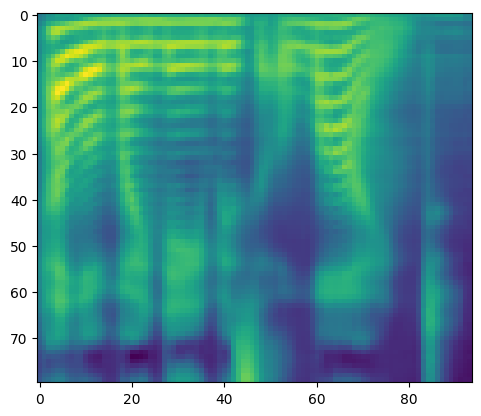

In [47]:
plt.figure()
plt.imshow(spectrogram.T)
plt.show()

In [48]:
with torch.no_grad():
    speech = vocoder(spectrogram)

In [49]:
from IPython.display import Audio
Audio(speech.numpy(), rate=16000)

In [50]:
import soundfile as sf
sf.write("output.wav", speech.numpy(), samplerate=16000)